# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [2]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [4]:
# TODO: view the shape of your data
transactions.shape

(1000000, 10)

In [5]:
# TODO: Begin your EDA
transactions.rename(columns={"oldbalanceOrg": "oldbalanceOrig"}, inplace=True)
transactions.describe()

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06,0.001297,0.000001
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06,0.035991,0.001000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05,0.000000,0.000000
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06,0.000000,0.000000
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08,1.000000,1.000000


## Univariate EDA

- We see that average isFraud (the proportion of 1's [True] to 0's [False]) is 0.001297
    - Multiplyting this average with the count of all data points, we get: 1,297 actually fraudulent transactions
    - Knowing this gives a better idea of how sensitive classification needs to be...
- Similarly, we can see that the average isFlaggedFraud is 0.000001
    - Only ONE transaction isFlaggedFraud!

In [6]:
# Check for missing values
transactions.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
# Check for repeat nameOrig and nameDest transactions

unique_orig = transactions["nameOrig"].nunique()
unique_dest = transactions["nameDest"].nunique()

print("Unique Origin Acc.:", unique_orig)
print("Unique Destination Acc.:", unique_dest)
print("---------------------------------------------------------------")
print("Remaining non-unique Origin Acc.:", 1000000 - unique_orig)
print("Remaining non-unique Origin Acc.:", 1000000 - unique_dest)

Unique Origin Acc.: 999771
Unique Destination Acc.: 648257
---------------------------------------------------------------
Remaining non-unique Origin Acc.: 229
Remaining non-unique Origin Acc.: 351743


## Observations:
- There are origin and destination accounts that appear more than once

In [8]:
# Identifying the origin and destination accounts that appear more than once
duplicate_orig = transactions[transactions.duplicated(subset=["nameOrig"], keep=False)]
duplicate_dest = transactions[transactions.duplicated(subset=["nameDest"], keep=False)]

grouped_duplicate_orig = duplicate_orig.groupby(["nameOrig"])
group_counts_orig = grouped_duplicate_orig.size()

grouped_duplicate_dest = duplicate_dest.groupby("nameDest")
group_counts_dest = grouped_duplicate_dest.size()

print("Duplicate Origin Accounts:\n", group_counts_orig)
print("-" * 30)
print("Duplicate Destination Accounts:\n", group_counts_dest)
print("-" * 30)

###########################################################################

# Just to see what kind of repeats we are dealing with
print("Max Acc. Origin Reps:", group_counts_orig.values)
print("Max Acc. Destination Reps:", group_counts_dest.values)


Duplicate Origin Accounts:
 nameOrig
C100367851     2
C1004685418    2
C1011575884    2
C1016949303    2
C1018801502    2
              ..
C938168688     2
C94300243      2
C96045998      2
C97308318      2
C982719969     2
Length: 229, dtype: int64
------------------------------
Duplicate Destination Accounts:
 nameDest
C1000015936    4
C1000022185    4
C1000030947    4
C1000038201    5
C1000044204    2
              ..
M773387373     2
M884553151     2
M891225462     2
M914809512     2
M969930573     2
Length: 155880, dtype: int64
------------------------------
Max Acc. Origin Reps: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [9]:
# Analyzing grouped duplicate_dest accounts:

print("Grouped duplicate_dest by 'nameDest':\n", grouped_duplicate_dest.value_counts().tail(13))  # using .value_counts() for easier viewing (remember: last column is count, not isFlaggedFraud)
print("--------------GROUP COUNTS DEST------------------\n")
print(group_counts_dest)

# Extracting counts of duplicate_dest accounts greater than 2
print("-------------- > 2 ---------------------\n")
greater_duplicate_dest = group_counts_dest[group_counts_dest > 2]
print("Unique Duplicate Destination Account COUNTS:", greater_duplicate_dest.unique())
print("Duplicate Destination Accounts with Count > 2:\n", greater_duplicate_dest)
print("Max Duplicate Destination Account:\n", greater_duplicate_dest.max())

print("-------------- 22 ---------------------\n")
max_duplicate_dest = group_counts_dest[group_counts_dest == 22]
print("Account of interest:\n", max_duplicate_dest)

Grouped duplicate_dest by 'nameDest':
 nameDest    type     amount    nameOrig     oldbalanceOrig  newbalanceOrig  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
M569810311  PAYMENT  34452.99  C1975727416  963.00          0.00            0.0             0.0             0        0                 1
M685108850  PAYMENT  29257.04  C2063027987  0.00            0.00            0.0             0.0             0        0                 1
                     34969.23  C1340928427  0.00            0.00            0.0             0.0             0        0                 1
M773387373  PAYMENT  15906.14  C1361728013  0.00            0.00            0.0             0.0             0        0                 1
                     25534.49  C1360981352  0.00            0.00            0.0             0.0             0        0                 1
M884553151  PAYMENT  13054.72  C946597118   0.00            0.00            0.0             0.0             0        0                 1
       

## Observations:
- We have a max of 2 origin transactions per non-unique transaction (229 accounts)
- We have 155,880 destination accounts that appear in more than one transaction
- 85,004 destination accounts appear more than 2 times
- Account C2083562754 appears 22 times!

## Questions:
- How many transactions, with destination accounts that appear more than once, are flagged (isFlaggedFraud == 1)?
- Are any of these transactions actually fraud (isFraud == 1)?
- (Destination account C2083562754 appears 22 times!) Are all those instances actual fraud, or flagged fraud?

In [11]:
# Extracting data where isFlaggedFraud == 1 (DESTINATION)
flagged_fraud_dest_rows = duplicate_dest[duplicate_dest["isFlaggedFraud"] == 1]
print(flagged_fraud_dest_rows)

Empty DataFrame
Columns: [type, amount, nameOrig, oldbalanceOrig, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


In [12]:
# Extracting data where isFraud == 1      (DESTINATION)
fraud_dest_rows = duplicate_dest[duplicate_dest["isFraud"] == 1]
print(fraud_dest_rows)

            type      amount     nameOrig  oldbalanceOrig  newbalanceOrig  \
439     CASH_OUT   530354.58  C1119661582       530354.58             0.0   
2168    CASH_OUT   841052.98  C1776675634       841052.98             0.0   
6633    CASH_OUT   150929.12  C1873591619       150929.12             0.0   
10513   TRANSFER   581421.85  C1021314422       581421.85             0.0   
14217   CASH_OUT  1005365.24  C2007750863      1005365.24             0.0   
...          ...         ...          ...             ...             ...   
981704  CASH_OUT  8020192.15  C1073081182      8020192.15             0.0   
990076  TRANSFER    29707.86  C1825456600        29707.86             0.0   
994954  TRANSFER   244068.01  C1087133093       244068.01             0.0   
997654  CASH_OUT  1421665.98   C467140343      1421665.98             0.0   
998998  CASH_OUT  1749325.14  C1029257629      1749325.14             0.0   

           nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFrau

In [61]:
# Filter for fraudulent transactions within duplicate_dest
fraud_transactions = duplicate_dest[duplicate_dest["isFraud"] == 1]

# Count the total number of transactions for each nameDest
duplicate_counts = duplicate_dest["nameDest"].value_counts()

# Map the duplicate counts to the fraud transactions
fraud_transactions["duplicate_count"] = fraud_transactions["nameDest"].map(duplicate_counts)

# Extract the duplicate counts for fraudulent transactions
fraud_duplicate_counts = fraud_transactions["duplicate_count"]

print("Duplicate counts for fraudulent transactions:\n", fraud_duplicate_counts.tolist())

# Count the number of duplicate_dest accounts flagged as fraud using the fraud_duplicate_counts
fraud_count = fraud_duplicate_counts.value_counts()
print("Number of duplicate_dest accounts flagged as fraud:\n", fraud_count)

Duplicate counts for fraudulent transactions:
 [8, 2, 2, 4, 3, 5, 2, 3, 5, 2, 10, 5, 2, 8, 4, 7, 2, 4, 2, 2, 4, 8, 3, 3, 4, 3, 4, 2, 4, 3, 2, 3, 3, 3, 3, 2, 3, 6, 2, 3, 4, 9, 3, 2, 3, 6, 2, 3, 5, 5, 3, 3, 2, 4, 2, 2, 3, 2, 4, 3, 3, 3, 2, 2, 6, 4, 3, 2, 9, 4, 2, 2, 5, 2, 2, 3, 8, 2, 4, 2, 6, 4, 3, 3, 3, 2, 4, 3, 2, 4, 3, 9, 5, 5, 2, 2, 3, 2, 2, 4, 3, 5, 3, 9, 5, 3, 3, 4, 6, 3, 3, 5, 3, 4, 4, 2, 3, 2, 2, 2, 2, 4, 2, 5, 3, 4, 5, 2, 6, 3, 3, 4, 2, 2, 6, 2, 3, 4, 6, 7, 4, 3, 3, 2, 3, 2, 10, 3, 2, 6, 5, 2, 3, 5, 3, 4, 2, 4, 4, 3, 3, 3, 3, 4, 4, 4, 3, 3, 2, 2, 2, 3, 5, 2, 4, 2, 3, 3, 5, 3, 5, 2, 4, 2, 7, 4, 5, 2, 4, 2, 4, 2, 2, 6, 8, 2, 4, 2, 4, 2, 3, 2, 2, 6, 4, 7, 4, 2, 5, 3, 2, 7, 7, 3, 4, 5, 4, 2, 2, 2, 3, 3, 2, 2, 2, 2, 5, 8, 4, 2, 2, 4, 12, 3, 5, 2, 3, 7, 2, 3, 2, 2, 4, 2, 3, 2, 2, 2, 2, 2, 6, 3, 5, 4, 3, 4, 6, 2, 2, 2, 4, 8, 2, 2, 3, 4, 10, 2, 2, 5, 2, 2, 3, 4, 2, 3, 2, 2, 3, 3, 3, 7, 2, 2, 3, 5, 2, 2, 5, 6, 2, 3, 2, 3, 2, 3, 3, 4, 2, 3, 3, 5, 2, 11, 2, 6, 4, 5, 3, 2, 3, 2, 3, 3, 3, 2,

/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_56903/2662656164.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions["duplicate_count"] = fraud_transactions["nameDest"].map(duplicate_counts)


In [13]:
fraud_dest_rows_transfer = fraud_dest_rows[fraud_dest_rows["type"] == "TRANSFER"]
fraud_dest_rows_transfer.shape

(148, 10)

In [14]:
fraud_dest_rows_cash_out = fraud_dest_rows[fraud_dest_rows["type"] == "CASH_OUT"]
fraud_dest_rows_cash_out.shape

(384, 10)

In [15]:
# Extracting data where isFlaggedFraud == 1 (ORIGIN)
flagged_fraud_orig_rows = duplicate_orig[duplicate_orig["isFlaggedFraud"] == 1]
print(flagged_fraud_orig_rows)

Empty DataFrame
Columns: [type, amount, nameOrig, oldbalanceOrig, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


In [16]:
# Extracting data where isFraud == 1      (ORIGIN)
fraud_orig_rows = duplicate_orig[duplicate_orig["isFraud"] == 1]
print(fraud_orig_rows)

Empty DataFrame
Columns: [type, amount, nameOrig, oldbalanceOrig, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


In [17]:
# Taking a closer look at the C2083562754 destination transactions
fraud_dest_rows_max = duplicate_dest[duplicate_dest["nameDest"] == 'C2083562754']
fraud_dest_rows_max = fraud_dest_rows_max[fraud_dest_rows_max["isFraud"] == 1]
print(fraud_dest_rows_max)

Empty DataFrame
Columns: [type, amount, nameOrig, oldbalanceOrig, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


## Observations:
- None of the duplicate origin accounts were in any fraudulent transactions
    - None of these transactions were flagged as fraud
* 532 transactions involving duplicate destination accounts were fraud!
    - None of these transactions were correctly identified as fraud...
    - **148 are TRANSFERs, 384 are CASH_OUT**
    - This is more than a third of all truly fraud transactions!
- Destination account C2083562754 had no instances of fraud
    - None of these transactions were flagged fraud, either
    - After about 7 duplications the transactions are less likely to be fraudulent

## Questions:
- What is common amongst the fraudulent dup. transactions?
- What is it about the transactions involving destination account C2083562754 that indicate non-fraudulent behavior?
- Could this knowledge be used to build a better predictor?

## Approach:
- Visualize each set's transaction amt and types (old/new balanceOrig and old/new balanceDest did not give interpretable results)

(507623, 10)
(507091, 10)


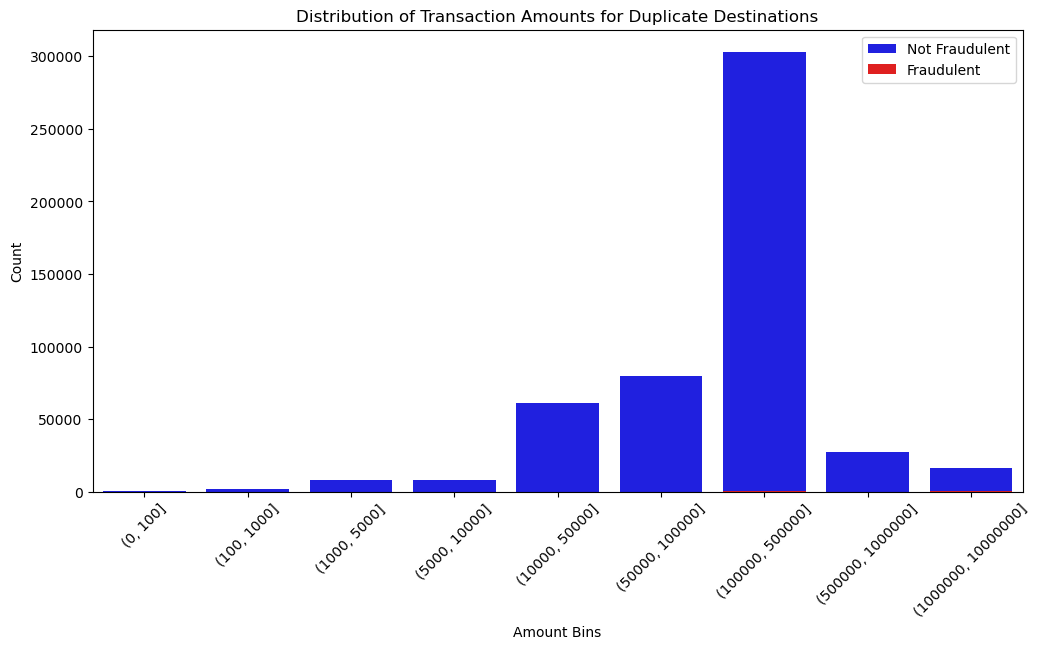

In [18]:
# Separating the fraud transactions from the not fraud ones, amongst the duplicate set: 
# duplicate_dest_dropped(a) vs. fraud_dest_rows(b)

print(duplicate_dest.shape)
duplicate_dest_dropped = duplicate_dest.drop(axis=0, index=fraud_dest_rows.index)
print(duplicate_dest_dropped.shape)

# Visualizing transaction amt first...

bins = [0, 100, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 10000000]
binned_amount_a = pd.cut(duplicate_dest_dropped["amount"], bins=bins) # Note: returned pd Series of labels (intervals?)
bin_counts_a = binned_amount_a.value_counts().sort_index()  # Extract bin counts, labeled
bin_labels = bin_counts_a.index.astype(str)  # Extract bin labels

binned_amount_b = pd.cut(fraud_dest_rows["amount"], bins=bins)
bin_counts_b = binned_amount_b.value_counts().sort_index()


plt.figure(figsize=(12, 6))
sns.barplot(x=bin_labels, y=bin_counts_a.values, label='Not Fraudulent', color='blue')
sns.barplot(x=bin_labels, y=bin_counts_b.values, label='Fraudulent', color='red')
plt.xticks(rotation=45)
plt.xlabel('Amount Bins')
plt.ylabel('Count')
plt.title('Distribution of Transaction Amounts for Duplicate Destinations')
plt.legend()
plt.show()



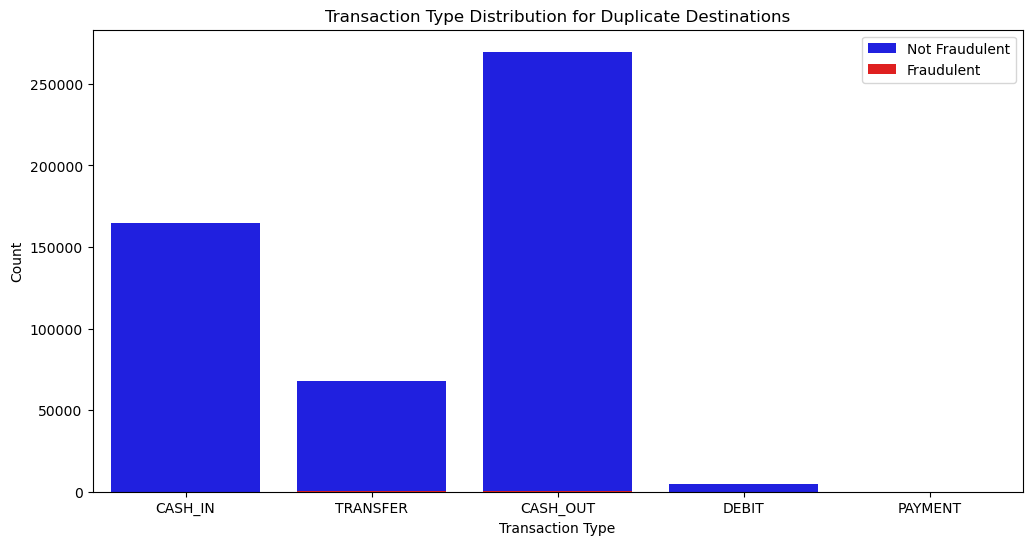

In [19]:
# Visualizing type
plt.figure(figsize=(12, 6))
sns.countplot(x='type', data=duplicate_dest_dropped, label='Not Fraudulent', color='blue')
sns.countplot(x='type', data=fraud_dest_rows, label='Fraudulent', color='red')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Transaction Type Distribution for Duplicate Destinations')
plt.legend()
plt.show()

## Observations:
- Amounts between 100,000 and 10,000,000 and involved a duplicate destination, more likely to be fraudulent
- TRANSFER and CASH_OUT transacttions, more likely to be fraudulent

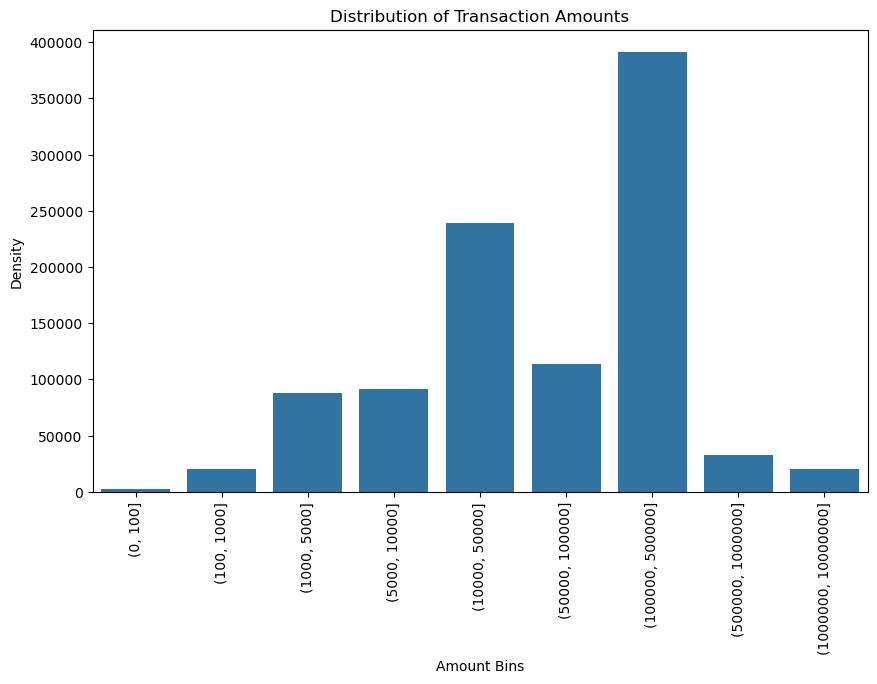

In [20]:
# Distribution of ["amount"]:

binned_amount = pd.cut(transactions["amount"], bins=bins) # Note: returned pd Series of labels (intervals?)
bin_counts = binned_amount.value_counts().sort_index()  # Extract unique bin labels
bin_labels = bin_counts.index   # Extract bin labels

plt.figure(figsize=(10, 6))
sns.barplot(x=bin_labels, y=bin_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Amount Bins")
plt.ylabel("Density")
plt.title("Distribution of Transaction Amounts")
plt.show()

/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_56903/3847845079.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = transactions.groupby(["amt_bins", "isFraud"]).size().reset_index(name="count")


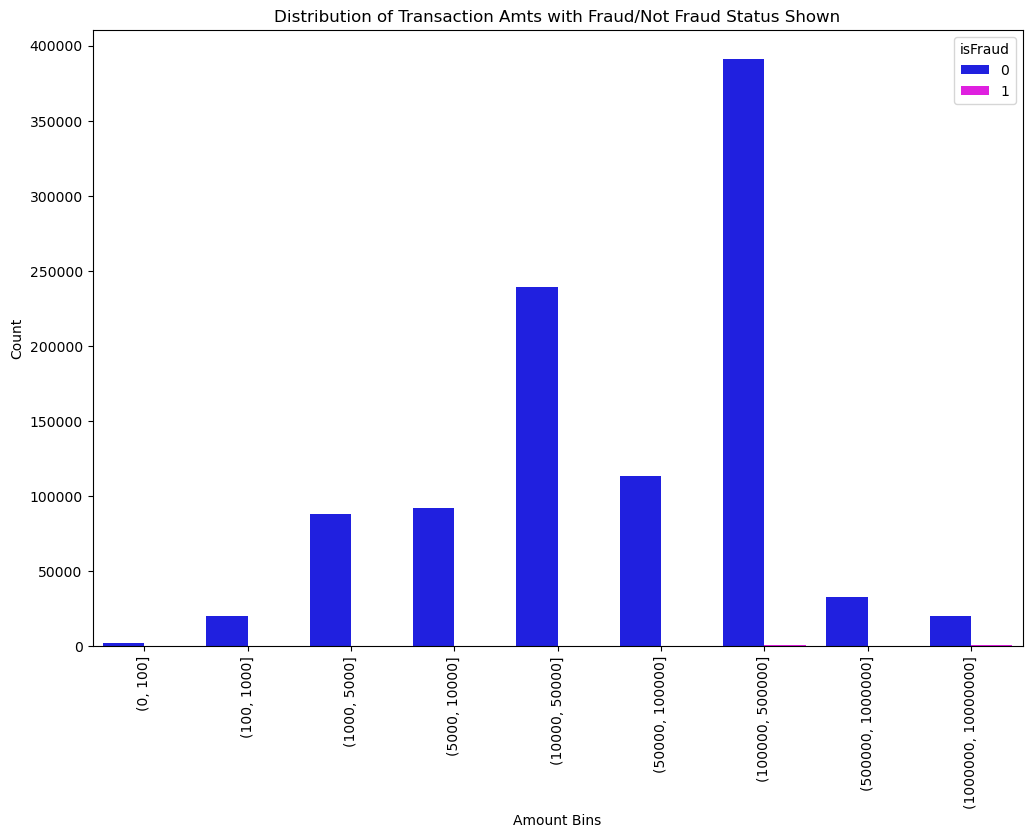

In [21]:
# Visualizing the amounts of transactions that are actual fraud, by transaction amount

bins = [0, 100, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 10000000]
binned_amount = pd.cut(transactions["amount"], bins=bins)
transactions["amt_bins"] = binned_amount

# Group data by bins and fraud flags
fraud_counts = transactions.groupby(["amt_bins", "isFraud"]).size().reset_index(name="count")

plt.figure(figsize=(12, 8))
sns.barplot(data=fraud_counts, x="amt_bins", y="count", hue="isFraud", palette={True: "magenta", False: "blue"})

plt.xticks(rotation=90)
plt.xlabel("Amount Bins")
plt.ylabel("Count")
plt.title("Distribution of Transaction Amts with Fraud/Not Fraud Status Shown")
plt.show()

## Observations:
- Some transactions > 100,000 are fraud, though none appear to be flagged
- Very difficult to tell visually (due to there being only one flagged transaction)

## Questions:
- Are most (if not all) of the fraudulent transactions > 100,000?
- How many of them are accurately flagged?

In [22]:
transactions[(transactions["amount"] > 100000) & (transactions["isFraud"] == 1 )].shape

(1021, 11)

In [23]:
transactions[(transactions["amount"] > 100000) & (transactions["isFlaggedFraud"] == 1 )].shape

(1, 11)

- Out of 1,297 fraud transactions, 1,021 of them involve amounts greater than 100,000
- 78.72% of all fraud...

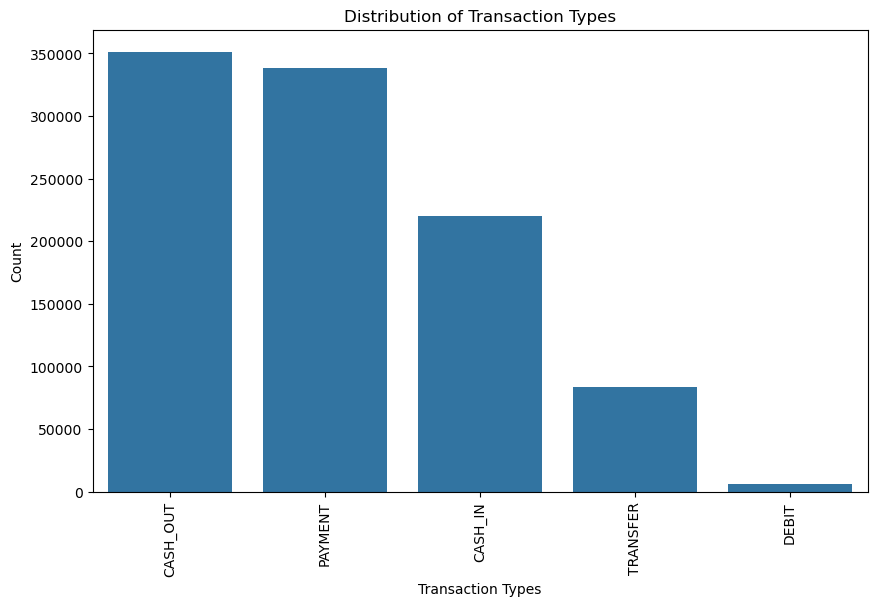

In [24]:
# Distribution of ["type"]:

# Count the amt of each type = num total type count
num_ttc = transactions["type"].value_counts()
# Separate out transaction types
trans_types = transactions["type"].value_counts().index

# Plot the data

plt.figure(figsize=(10, 6))
sns.barplot(x=trans_types, y=num_ttc.values)
plt.xticks(rotation=90)
plt.xlabel("Transaction Types")
plt.ylabel("Count")
plt.title("Distribution of Transaction Types")
plt.show()

In [25]:
# Separating data by transaction type to observe summary statistics

cash_out_trans = transactions[transactions["type"] == "CASH_OUT"]
payment_trans = transactions[transactions["type"] == "PAYMENT"]
cash_in_trans = transactions[transactions["type"] == "CASH_IN"]
transfer_trans = transactions[transactions["type"] == "TRANSFER"]
debit_trans = transactions[transactions["type"] == "DEBIT"]

In [26]:
cash_out_trans.describe()

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,3.513600e+05,3.513600e+05,3.513600e+05,3.513600e+05,3.513600e+05,351360.000000,351360.0
mean,1.755847e+05,4.593080e+04,1.754215e+04,1.498517e+06,1.692075e+06,0.001870,0.0
std,1.703743e+05,1.768271e+05,1.128625e+05,3.664365e+06,3.697020e+06,0.043202,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,7.238282e+04,0.000000e+00,0.000000e+00,1.161956e+05,2.869972e+05,0.000000,0.0
50%,1.462099e+05,5.440000e+02,0.000000e+00,4.887008e+05,6.887898e+05,0.000000,0.0
75%,2.458818e+05,3.142725e+04,0.000000e+00,1.503529e+06,1.733140e+06,0.000000,0.0
max,1.000000e+07,3.496252e+07,3.480408e+07,3.114049e+08,3.114929e+08,1.000000,0.0


/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_56903/3696228284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_out_trans["amt_bins"] = binned_amount  # Add bins as a new column
/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_56903/3696228284.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = cash_out_trans.groupby(["amt_bins", "isFraud"]).size().reset_index(name="count")


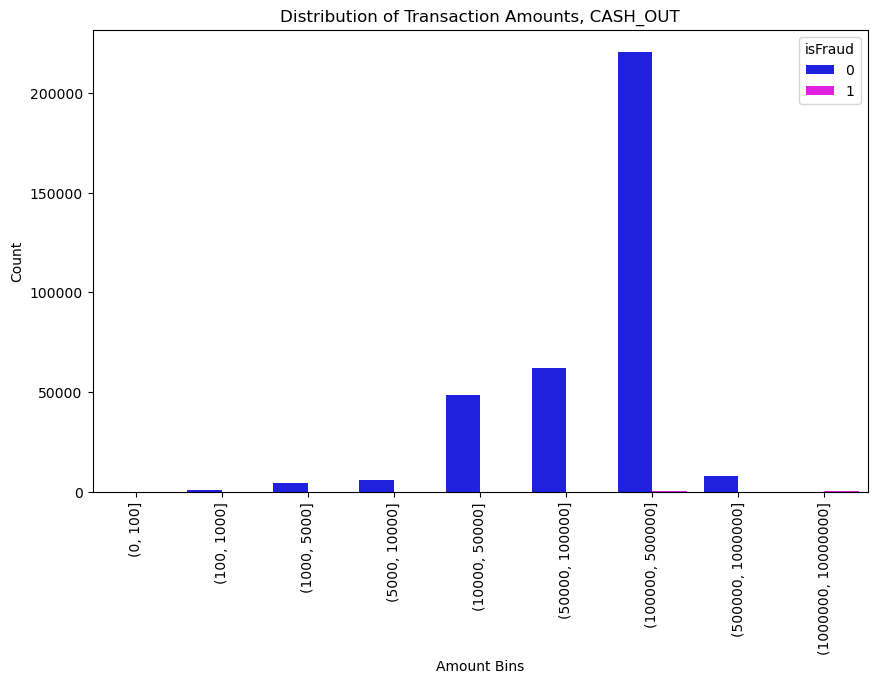

657


In [27]:
# Distribution of "amount" within CASH_OUT
binned_amount = pd.cut(cash_out_trans["amount"], bins=bins)  # Bin the amounts
cash_out_trans["amt_bins"] = binned_amount  # Add bins as a new column

# Group data by bins and fraud status
bin_counts = cash_out_trans.groupby(["amt_bins", "isFraud"]).size().reset_index(name="count")

plt.figure(figsize=(10, 6))
sns.barplot(data=bin_counts, x="amt_bins", y="count", hue="isFraud", palette={True : "magenta", False : "blue"})
plt.xticks(rotation=90)
plt.xlabel("Amount Bins")
plt.ylabel("Count")
plt.title("Distribution of Transaction Amounts, CASH_OUT")
plt.show()

print(len(cash_out_trans[cash_out_trans["isFraud"] == True]))

In [28]:
payment_trans.describe()

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,338573.000000,3.385730e+05,3.385730e+05,338573.0,338573.0,338573.0,338573.0
mean,13055.592085,6.813189e+04,6.175187e+04,0.0,0.0,0.0,0.0
std,12562.913360,2.038404e+05,2.018566e+05,0.0,0.0,0.0,0.0
min,0.030000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
25%,4377.100000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
50%,9481.670000,1.057700e+04,0.000000e+00,0.0,0.0,0.0,0.0
75%,17565.560000,6.096600e+04,4.971994e+04,0.0,0.0,0.0,0.0
max,230549.180000,3.461632e+07,3.460283e+07,0.0,0.0,0.0,0.0


/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_56903/1099560624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment_trans["amt_bins"] = binned_amount  # Add bins as a new column
/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_56903/1099560624.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = payment_trans.groupby(["amt_bins", "isFraud"]).size().reset_index(name="count")


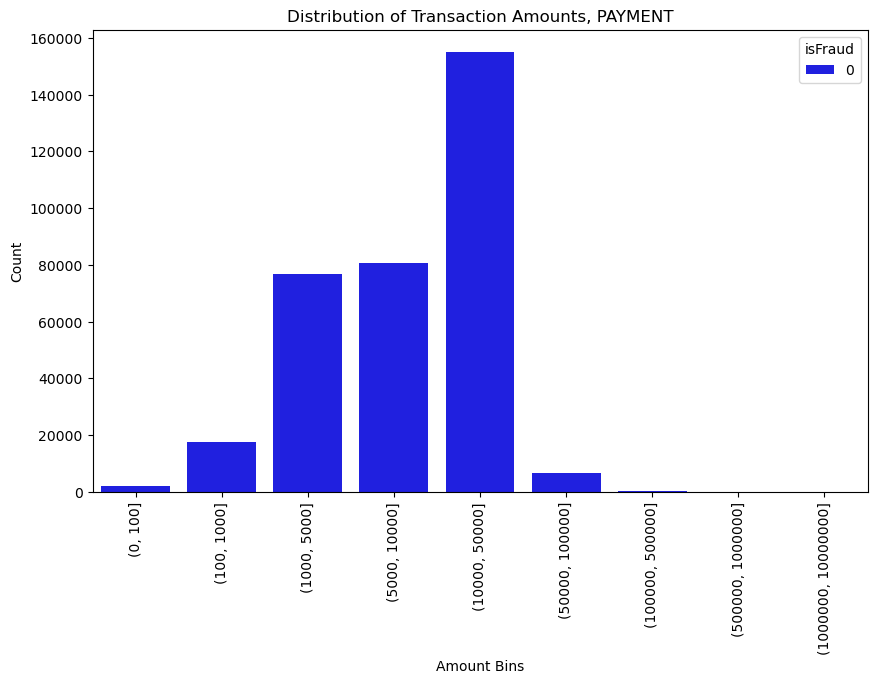

In [29]:
# Distribution of "amount" within PAYMENT
binned_amount = pd.cut(payment_trans["amount"], bins=bins)  # Bin the amounts
payment_trans["amt_bins"] = binned_amount  # Add bins as a new column

# Group data by bins and fraud status
bin_counts = payment_trans.groupby(["amt_bins", "isFraud"]).size().reset_index(name="count")

plt.figure(figsize=(10, 6))
sns.barplot(data=bin_counts, x="amt_bins", y="count", hue="isFraud", palette={True : "magenta", False : "blue"})
plt.xticks(rotation=90)
plt.xlabel("Amount Bins")
plt.ylabel("Count")
plt.title("Distribution of Transaction Amounts, PAYMENT")
plt.show()

In [30]:
cash_in_trans.describe()

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.199550e+05,2.199550e+05,2.199550e+05,2.199550e+05,2.199550e+05,219955.0,219955.0
mean,1.689289e+05,3.596360e+06,3.765287e+06,1.590204e+06,1.469566e+06,0.0,0.0
std,1.267864e+05,5.300688e+06,5.296136e+06,3.725292e+06,3.734650e+06,0.0,0.0
min,4.300000e-01,0.000000e+00,1.222800e+02,0.000000e+00,0.000000e+00,0.0,0.0
25%,7.009285e+04,3.796450e+04,2.500197e+05,1.619195e+05,4.389496e+04,0.0,0.0
50%,1.429430e+05,1.203870e+06,1.375046e+06,5.505957e+05,3.893424e+05,0.0,0.0
75%,2.400851e+05,5.301444e+06,5.464044e+06,1.630136e+06,1.476982e+06,0.0,0.0
max,1.609288e+06,3.856340e+07,3.893942e+07,3.555534e+08,3.553814e+08,0.0,0.0


/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_56903/3317461627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_in_trans["amt_bins"] = binned_amount  # Add bins as a new column
/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_56903/3317461627.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = cash_in_trans.groupby(["amt_bins", "isFraud"]).size().reset_index(name="count")


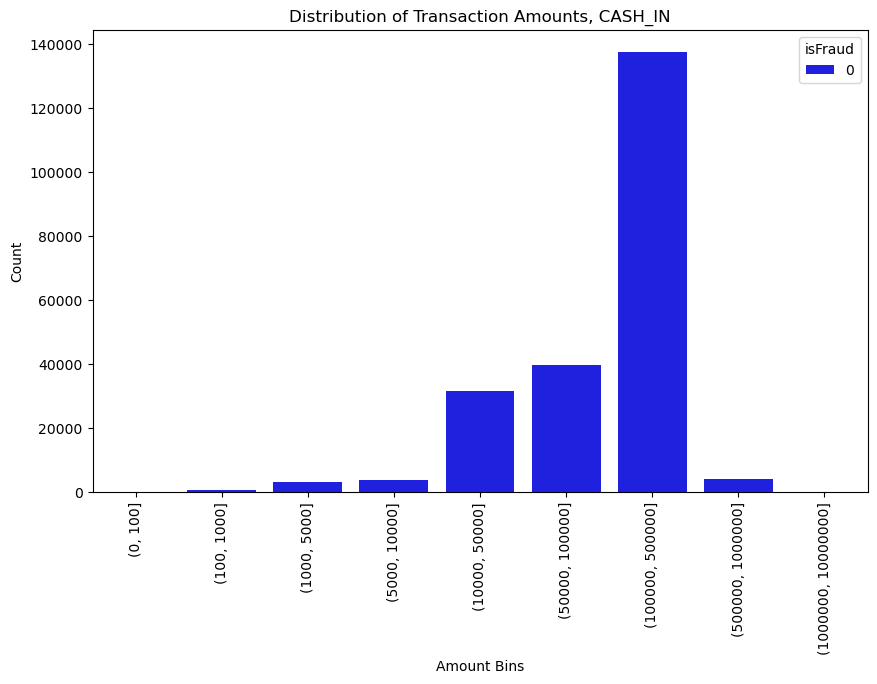

In [31]:
# Distribution of "amount" within CASH_IN
binned_amount = pd.cut(cash_in_trans["amount"], bins=bins)  # Bin the amounts
cash_in_trans["amt_bins"] = binned_amount  # Add bins as a new column

# Group data by bins and fraud status
bin_counts = cash_in_trans.groupby(["amt_bins", "isFraud"]).size().reset_index(name="count")

plt.figure(figsize=(10, 6))
sns.barplot(data=bin_counts, x="amt_bins", y="count", hue="isFraud", palette={True : "magenta", False : "blue"})
plt.xticks(rotation=90)
plt.xlabel("Amount Bins")
plt.ylabel("Count")
plt.title("Distribution of Transaction Amounts, CASH_IN")
plt.show()

In [32]:
transfer_trans.describe()

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,8.369500e+04,8.369500e+04,8.369500e+04,8.369500e+04,8.369500e+04,83695.000000,83695.000000
mean,9.118272e+05,5.292574e+04,9.825963e+03,2.587964e+06,3.584685e+06,0.007647,0.000012
std,1.896175e+06,4.041144e+05,2.271813e+05,6.360681e+06,7.731880e+06,0.087112,0.003457
min,2.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.171058e+05,0.000000e+00,0.000000e+00,2.263609e+05,7.532984e+05,0.000000,0.000000
50%,4.878837e+05,0.000000e+00,0.000000e+00,1.009686e+06,1.721033e+06,0.000000,0.000000
75%,9.780277e+05,2.553800e+04,0.000000e+00,2.740193e+06,3.783503e+06,0.000000,0.000000
max,9.244552e+07,3.958504e+07,2.958504e+07,3.553805e+08,3.560159e+08,1.000000,1.000000


/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_56903/371934652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer_trans["amt_bins"] = binned_amount  # Add bins as a new column
/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_56903/371934652.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = transfer_trans.groupby(["amt_bins", "isFraud"]).size().reset_index(name="count")


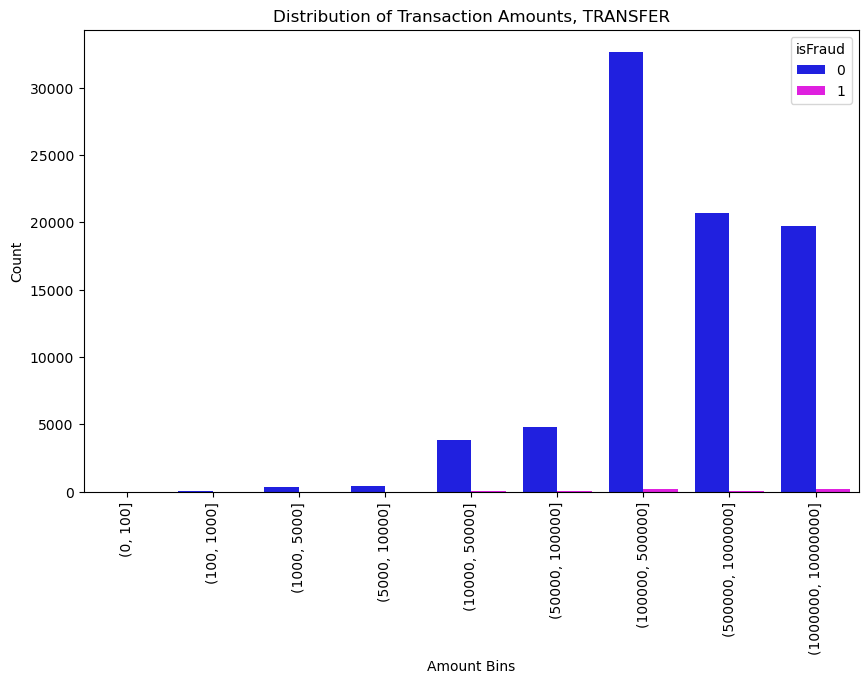

640


In [33]:
# Distribution of "amount" within TRANSFER
binned_amount = pd.cut(transfer_trans["amount"], bins=bins)  # Bin the amounts
transfer_trans["amt_bins"] = binned_amount  # Add bins as a new column

# Group data by bins and fraud status
bin_counts = transfer_trans.groupby(["amt_bins", "isFraud"]).size().reset_index(name="count")

plt.figure(figsize=(10, 6))
sns.barplot(data=bin_counts, x="amt_bins", y="count", hue="isFraud", palette={True : "magenta", False : "blue"})
plt.xticks(rotation=90)
plt.xlabel("Amount Bins")
plt.ylabel("Count")
plt.title("Distribution of Transaction Amounts, TRANSFER")
plt.show()

print(len(transfer_trans[transfer_trans["isFraud"] == True]))

In [34]:
debit_trans.describe()

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6417.000000,6.417000e+03,6.417000e+03,6.417000e+03,6.417000e+03,6417.0,6417.0
mean,5445.890813,6.942898e+04,6.595120e+04,1.552738e+06,1.569749e+06,0.0,0.0
std,13024.159140,1.380489e+05,1.372509e+05,4.740646e+06,4.744267e+06,0.0,0.0
min,5.240000,0.000000e+00,0.000000e+00,8.500000e+01,0.000000e+00,0.0,0.0
25%,1530.240000,1.476000e+03,0.000000e+00,1.314867e+05,1.382115e+05,0.0,0.0
50%,3099.530000,2.089500e+04,1.657569e+04,4.431517e+05,4.557592e+05,0.0,0.0
75%,5423.250000,6.860000e+04,6.275880e+04,1.420640e+06,1.447815e+06,0.0,0.0
max,389762.680000,2.499718e+06,2.492280e+06,1.912797e+08,1.912895e+08,0.0,0.0


/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_56903/2082223649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debit_trans["amt_bins"] = binned_amount  # Add bins as a new column
/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_56903/2082223649.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = debit_trans.groupby(["amt_bins", "isFraud"]).size().reset_index(name="count")


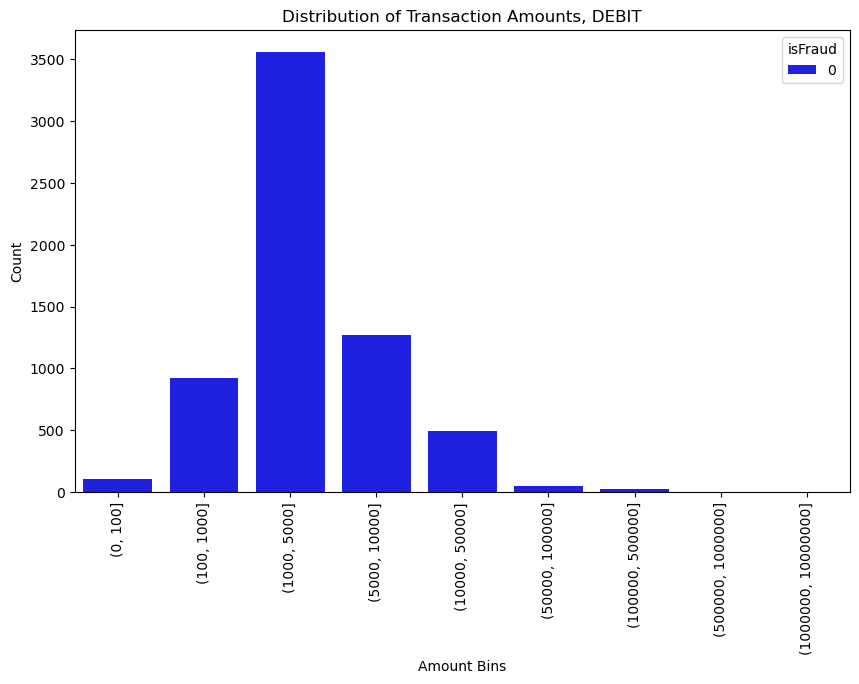

In [35]:
# Distribution of "amount" within DEBIT
binned_amount = pd.cut(debit_trans["amount"], bins=bins)  # Bin the amounts
debit_trans["amt_bins"] = binned_amount  # Add bins as a new column

# Group data by bins and fraud status
bin_counts = debit_trans.groupby(["amt_bins", "isFraud"]).size().reset_index(name="count")

plt.figure(figsize=(10, 6))
sns.barplot(data=bin_counts, x="amt_bins", y="count", hue="isFraud", palette={True : "magenta", False : "blue"})
plt.xticks(rotation=90)
plt.xlabel("Amount Bins")
plt.ylabel("Count")
plt.title("Distribution of Transaction Amounts, DEBIT")
plt.show()

## Observations:
- Only TRANSFER and CASH_OUT types contain fraudulent transactions

## Questions:
- What characteristics do fraudulent TRANSFER and CASH_OUT fraud transactions share within each type, and between both types?

In [36]:
# Analysis of fraud transactions (TRANSFER)
fraud_transfers = transfer_trans[transfer_trans["isFraud"] == True]
fraud_transfers.describe()

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.400000e+02,6.400000e+02,6.400000e+02,640.0,640.000000,640.0,640.000000
mean,1.384176e+06,1.699774e+06,3.164361e+05,0.0,544.226562,1.0,0.001563
std,2.262100e+06,4.003977e+06,2.338349e+06,0.0,11030.283888,0.0,0.039528
min,1.640000e+02,1.640000e+02,0.000000e+00,0.0,0.000000,1.0,0.000000
25%,1.314008e+05,1.314008e+05,0.000000e+00,0.0,0.000000,1.0,0.000000
50%,4.547748e+05,4.547748e+05,0.000000e+00,0.0,0.000000,1.0,0.000000
75%,1.474836e+06,1.474836e+06,0.000000e+00,0.0,0.000000,1.0,0.000000
max,1.000000e+07,3.958504e+07,2.958504e+07,0.0,267095.190000,1.0,1.000000


In [37]:
# Analysis of fraud transactions (CASH_OUT)
fraud_cash_out = cash_out_trans[cash_out_trans["isFraud"] == True]
fraud_cash_out.describe()

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.570000e+02,6.570000e+02,657.0,6.570000e+02,6.570000e+02,657.0,657.0
mean,1.326971e+06,1.324727e+06,0.0,8.934110e+05,2.234754e+06,1.0,0.0
std,2.244505e+06,2.245645e+06,0.0,2.527688e+06,3.318782e+06,0.0,0.0
min,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.0,0.0
25%,1.133096e+05,1.087795e+05,0.0,0.000000e+00,3.209775e+05,1.0,0.0
50%,3.741783e+05,3.668960e+05,0.0,1.247532e+05,1.010857e+06,1.0,0.0
75%,1.321091e+06,1.321091e+06,0.0,7.752037e+05,2.930836e+06,1.0,0.0
max,1.000000e+07,1.000000e+07,0.0,4.614176e+07,4.690801e+07,1.0,0.0


## Observations:
- All oldbalanceDest for fraudulent TRANSFER type transactions were 0

## BIVARIATE EDA

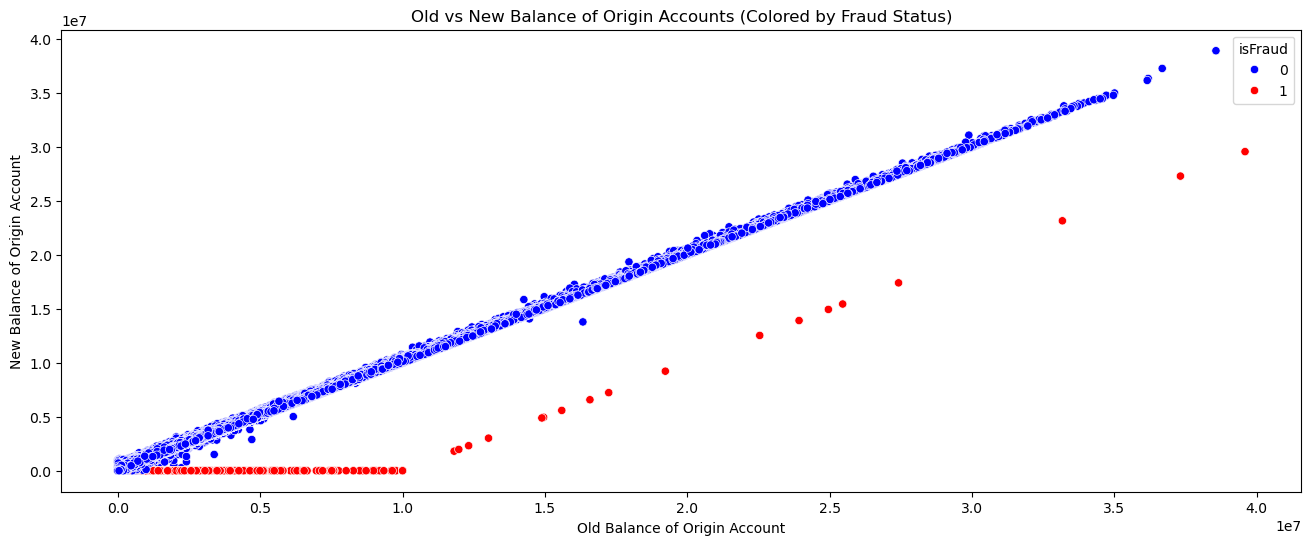

In [38]:
# Plotting oldbalanceOrig vs. newbalanceOrig

plt.figure(figsize=(16, 6))
sns.scatterplot(data=transactions, x="oldbalanceOrig", y="newbalanceOrig", hue="isFraud", palette={True: "red", False: "blue"})
plt.xlabel("Old Balance of Origin Account")
plt.ylabel("New Balance of Origin Account")
plt.title("Old vs New Balance of Origin Accounts (Colored by Fraud Status)")
plt.show()

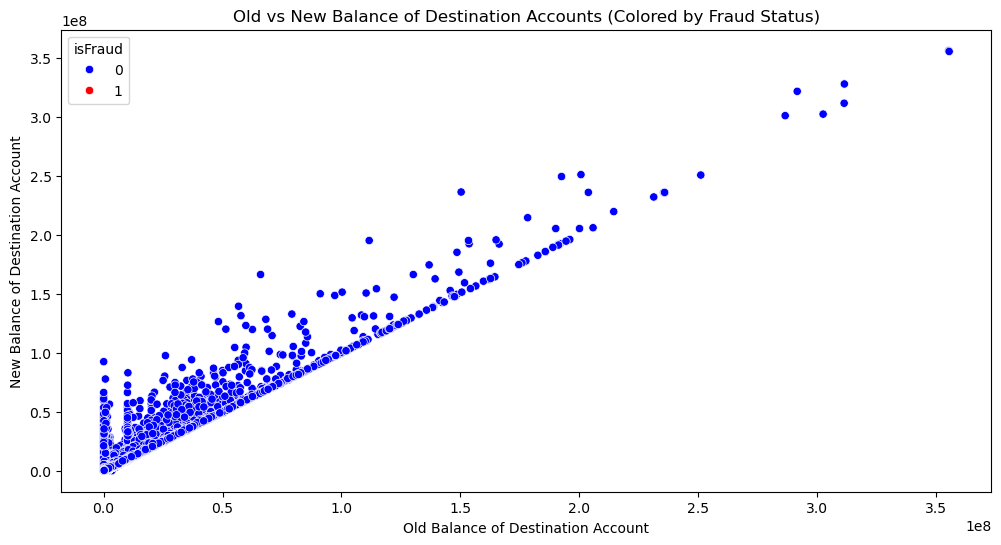

In [39]:
# Plotting oldbalanceDest vs. newbalanceDest

plt.figure(figsize=(12, 6))
sns.scatterplot(data=transactions, x="oldbalanceDest", y="newbalanceDest", hue="isFraud", palette={True: "red", False: "blue"})
plt.xlabel("Old Balance of Destination Account")
plt.ylabel("New Balance of Destination Account")
plt.title("Old vs New Balance of Destination Accounts (Colored by Fraud Status)")
plt.show()

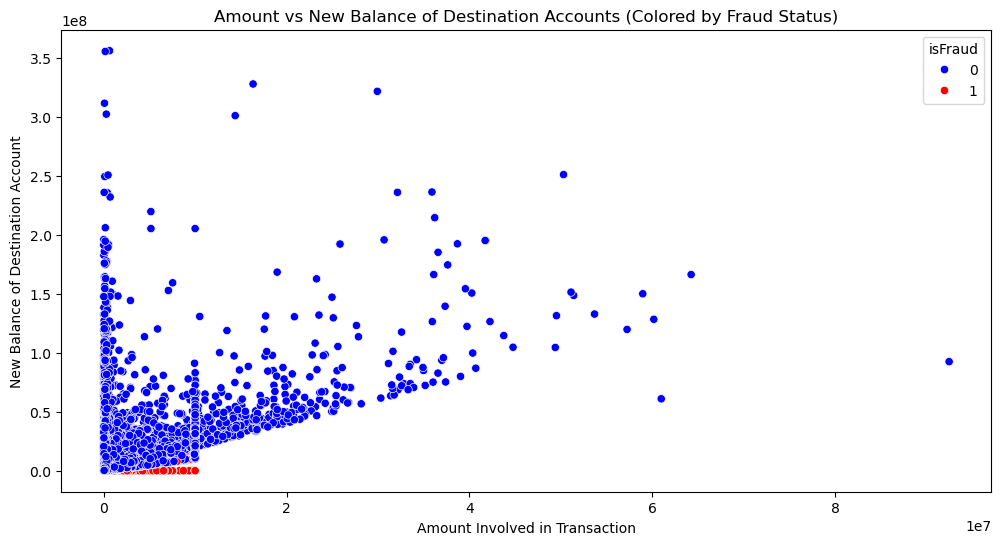

In [40]:
# Plotting amount vs. newbalanceDest

plt.figure(figsize=(12, 6))
sns.scatterplot(data=transactions, x="amount", y="newbalanceDest", hue="isFraud", palette={True: "red", False: "blue"})
plt.xlabel("Amount Involved in Transaction")
plt.ylabel("New Balance of Destination Account")
plt.title("Amount vs New Balance of Destination Accounts (Colored by Fraud Status)")
plt.show()

In [41]:
# Pivot table!
#pd.pivot_table(..., columns=, index=, values=, aggfunc=)

## Observations:
- Many of the fraudulent transactions tended to empty their origin accounts
- Origin accounts with > 10,000,000 never emptied but were drastically reduced in fraud transactions

## Multivariate EDA

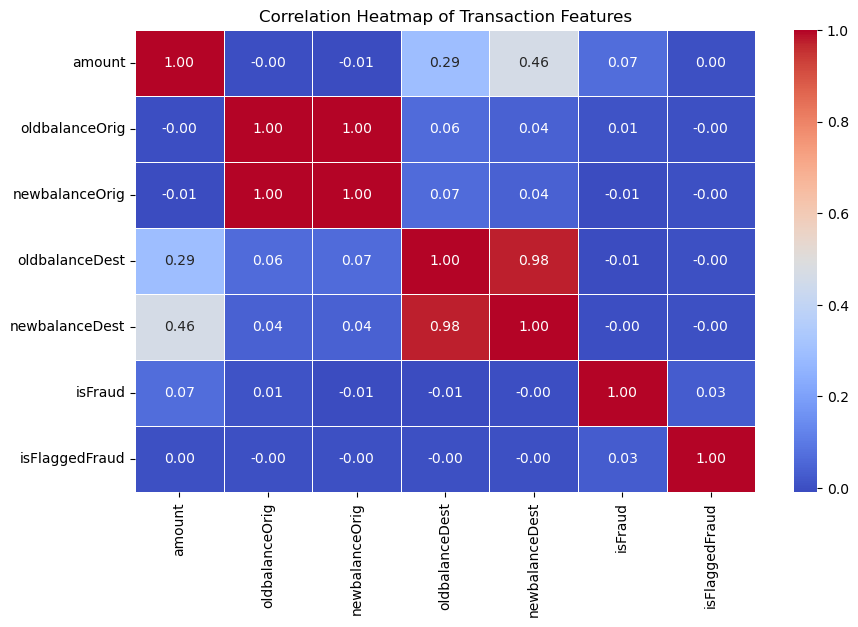

In [42]:
# Heatmap of correlations
num_transactions = transactions.select_dtypes(include=[np.number])  # Select only numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(num_transactions.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Transaction Features")
plt.show()

## Observations:
- Resulting heatmap appears to corroborate previous observations
    - newbalanceDest and amount have a moderately positive correlation, as shown in the previous bivarate analysis

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

ANS: 
- For amounts:
    - Descriptive statistics show
    - mean:  179,620.80
    - median: 74,435.00
    - A right skewed distribution

- For oldbalanceOrig:
    - Descriptive statistics show
    - mean:  835,118.40
    - median: 14,110.00
    - Another right skewed distribution

- For newbalanceOrig:
    - mean: 856,510.40
    - median: 0
    - A very right skewed distribution

- For oldbalanceDest:
    - mean:  1,102,856.00
    - median: 133,184.90
    - Right skewed

- For newbalanceDest:
    - mean:  1,227,859.00
    - median: 214,865.20
    - Right skewed

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

ANS: An interesting pattern emerges in figure six where many of the fraudulent transactions share two characteristics:

    - Many of the fraudulent transactions tended to empty their origin accounts
    - Origin accounts with > 10,000,000 never emptied but were drastically reduced in fraud transactions

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

ANS:
Transfers were shown to have the greatest number of high transaction amounts, with a median amount of 487,883.70.
Debit transactions were shown to have consistently lower amounts involved, hovering around a median of 3,099.53.



### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

ANS: PAYMENT, CASH_IN, and DEBIT contain no fraudulent transactions. Between the remaining transaction types--CASH_OUT and TRANSFER--CASH_OUT has the greater amount of fraudulent transactions with 657 versus 640 TRANSFER type transactions.

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

ANS: The built-in fraud flag correctly flags one transaction as fraud, howeber it misses the other 1,296 fraudulent transactions in the dataset, which is 1/1297 or 0.08% of all actual fraud.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## NOTES (FOR FURTHER ANALYSIS):
- Would including a column determining whether a transaction is > 100,000 make for better predictions in the model(s)?
- Could destination account C2083562754 transactions be used as a check/example for instances where a destination account appears many times (over some identifiable threshold)?
- Should a new feature be created that contains the calculations of old/newbalanceOrig and old/newbalanceDest? "amount" appears to be all positive values.